## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.163860 -0.336017 -0.819745  0.311266 -0.671353 -0.133101
1  1.661739 -0.681068 -0.613664  0.928261 -0.784259  0.572196
2  1.442913 -0.599337  0.034850  1.493482 -0.532916  0.862207
3 -0.564378 -0.242061 -0.270050  0.628531  0.887684  0.148033
4  0.077056 -0.779982 -1.599758  0.358555 -1.672699 -0.028421


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0023387	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9919795	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9822794	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9719715	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9625385	total: 71ms	remaining: 14.1s
5:	learn: 0.9534873	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9431566	total: 72.1ms	remaining: 10.2s
7:	learn: 0.9324612	total: 72.5ms	remaining: 8.99s
8:	learn: 0.9233822	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9146548	total: 73.7ms	remaining: 7.3s
10:	learn: 0.9035392	total: 74.2ms	remaining: 6.67s
11:	learn: 0.8937644	total: 75ms	remaining: 6.17s
12:	learn: 0.8843204	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8768116	total: 76.1ms	remaining: 5.36s
14:	learn: 0.8689951	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8605241	total: 77.1ms	remaining: 4.74s
16:	learn: 0.8523390	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8453975	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8390056	total: 78.6ms	remaining: 4.0

84:	learn: 0.4651889	total: 109ms	remaining: 1.17s
85:	learn: 0.4611749	total: 109ms	remaining: 1.16s
86:	learn: 0.4571465	total: 110ms	remaining: 1.15s
87:	learn: 0.4531964	total: 110ms	remaining: 1.14s
88:	learn: 0.4489971	total: 110ms	remaining: 1.13s
89:	learn: 0.4458570	total: 111ms	remaining: 1.12s
90:	learn: 0.4416129	total: 111ms	remaining: 1.11s
91:	learn: 0.4373390	total: 112ms	remaining: 1.1s
92:	learn: 0.4335287	total: 112ms	remaining: 1.09s
93:	learn: 0.4300007	total: 112ms	remaining: 1.08s
94:	learn: 0.4261224	total: 113ms	remaining: 1.07s
95:	learn: 0.4221833	total: 113ms	remaining: 1.06s
96:	learn: 0.4191000	total: 114ms	remaining: 1.06s
97:	learn: 0.4157667	total: 114ms	remaining: 1.05s
98:	learn: 0.4126307	total: 114ms	remaining: 1.04s
99:	learn: 0.4091068	total: 115ms	remaining: 1.03s
100:	learn: 0.4059256	total: 115ms	remaining: 1.02s
101:	learn: 0.4023888	total: 115ms	remaining: 1.01s
102:	learn: 0.3991268	total: 116ms	remaining: 1.01s
103:	learn: 0.3952402	total: 

254:	learn: 0.1361508	total: 187ms	remaining: 547ms
255:	learn: 0.1352623	total: 188ms	remaining: 546ms
256:	learn: 0.1344052	total: 188ms	remaining: 545ms
257:	learn: 0.1333507	total: 189ms	remaining: 543ms
258:	learn: 0.1325985	total: 189ms	remaining: 541ms
259:	learn: 0.1316586	total: 190ms	remaining: 540ms
260:	learn: 0.1306630	total: 190ms	remaining: 539ms
261:	learn: 0.1298024	total: 191ms	remaining: 537ms
262:	learn: 0.1289888	total: 191ms	remaining: 536ms
263:	learn: 0.1280734	total: 192ms	remaining: 534ms
264:	learn: 0.1270986	total: 192ms	remaining: 533ms
265:	learn: 0.1261626	total: 193ms	remaining: 532ms
266:	learn: 0.1252125	total: 193ms	remaining: 530ms
267:	learn: 0.1244404	total: 194ms	remaining: 529ms
268:	learn: 0.1235582	total: 194ms	remaining: 528ms
269:	learn: 0.1226737	total: 195ms	remaining: 526ms
270:	learn: 0.1218991	total: 195ms	remaining: 524ms
271:	learn: 0.1211393	total: 195ms	remaining: 523ms
272:	learn: 0.1202065	total: 196ms	remaining: 521ms
273:	learn: 

474:	learn: 0.0378024	total: 292ms	remaining: 322ms
475:	learn: 0.0376279	total: 292ms	remaining: 322ms
476:	learn: 0.0374824	total: 293ms	remaining: 321ms
477:	learn: 0.0373233	total: 293ms	remaining: 320ms
478:	learn: 0.0371430	total: 294ms	remaining: 319ms
479:	learn: 0.0369504	total: 294ms	remaining: 319ms
480:	learn: 0.0367847	total: 295ms	remaining: 318ms
481:	learn: 0.0366674	total: 295ms	remaining: 317ms
482:	learn: 0.0365097	total: 295ms	remaining: 316ms
483:	learn: 0.0363464	total: 296ms	remaining: 315ms
484:	learn: 0.0361866	total: 296ms	remaining: 314ms
485:	learn: 0.0360262	total: 297ms	remaining: 314ms
486:	learn: 0.0359132	total: 297ms	remaining: 313ms
487:	learn: 0.0357323	total: 297ms	remaining: 312ms
488:	learn: 0.0355757	total: 298ms	remaining: 311ms
489:	learn: 0.0354217	total: 298ms	remaining: 310ms
490:	learn: 0.0352605	total: 299ms	remaining: 310ms
491:	learn: 0.0351089	total: 299ms	remaining: 309ms
492:	learn: 0.0349591	total: 300ms	remaining: 308ms
493:	learn: 

651:	learn: 0.0196941	total: 370ms	remaining: 198ms
652:	learn: 0.0195933	total: 371ms	remaining: 197ms
653:	learn: 0.0195769	total: 371ms	remaining: 196ms
654:	learn: 0.0195572	total: 371ms	remaining: 196ms
655:	learn: 0.0194762	total: 372ms	remaining: 195ms
656:	learn: 0.0194024	total: 372ms	remaining: 194ms
657:	learn: 0.0193716	total: 373ms	remaining: 194ms
658:	learn: 0.0193260	total: 373ms	remaining: 193ms
659:	learn: 0.0193067	total: 374ms	remaining: 193ms
660:	learn: 0.0192100	total: 374ms	remaining: 192ms
661:	learn: 0.0191685	total: 375ms	remaining: 191ms
662:	learn: 0.0191104	total: 375ms	remaining: 191ms
663:	learn: 0.0190917	total: 376ms	remaining: 190ms
664:	learn: 0.0190154	total: 376ms	remaining: 189ms
665:	learn: 0.0189970	total: 376ms	remaining: 189ms
666:	learn: 0.0189672	total: 377ms	remaining: 188ms
667:	learn: 0.0189378	total: 377ms	remaining: 187ms
668:	learn: 0.0189229	total: 378ms	remaining: 187ms
669:	learn: 0.0188690	total: 378ms	remaining: 186ms
670:	learn: 

878:	learn: 0.0111494	total: 475ms	remaining: 65.3ms
879:	learn: 0.0111329	total: 475ms	remaining: 64.8ms
880:	learn: 0.0110854	total: 476ms	remaining: 64.2ms
881:	learn: 0.0110692	total: 476ms	remaining: 63.7ms
882:	learn: 0.0110291	total: 477ms	remaining: 63.2ms
883:	learn: 0.0110215	total: 477ms	remaining: 62.6ms
884:	learn: 0.0110152	total: 477ms	remaining: 62ms
885:	learn: 0.0109688	total: 478ms	remaining: 61.5ms
886:	learn: 0.0109166	total: 478ms	remaining: 60.9ms
887:	learn: 0.0108713	total: 479ms	remaining: 60.4ms
888:	learn: 0.0108427	total: 479ms	remaining: 59.8ms
889:	learn: 0.0107919	total: 480ms	remaining: 59.3ms
890:	learn: 0.0107641	total: 480ms	remaining: 58.8ms
891:	learn: 0.0107165	total: 481ms	remaining: 58.2ms
892:	learn: 0.0106623	total: 481ms	remaining: 57.7ms
893:	learn: 0.0106279	total: 482ms	remaining: 57.1ms
894:	learn: 0.0105942	total: 482ms	remaining: 56.6ms
895:	learn: 0.0105670	total: 483ms	remaining: 56.1ms
896:	learn: 0.0105314	total: 483ms	remaining: 55

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

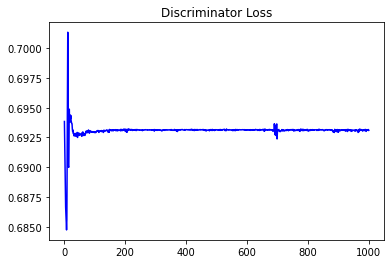

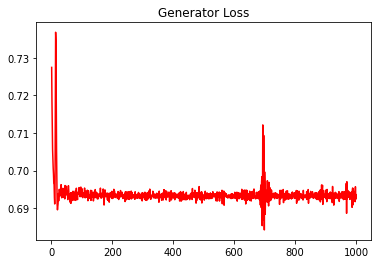

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09041850877994173


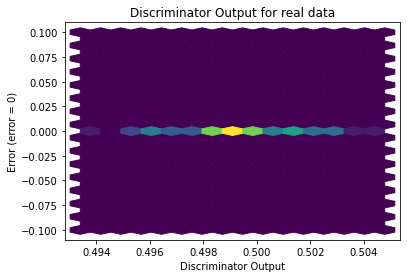

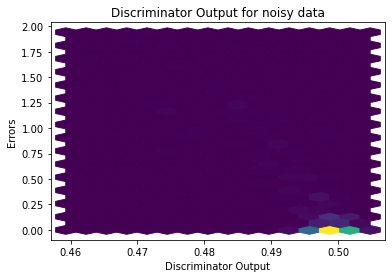

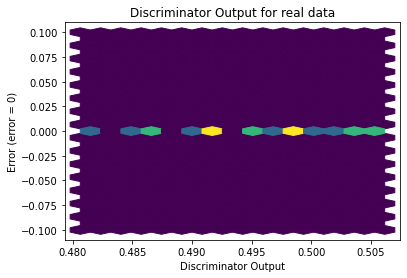

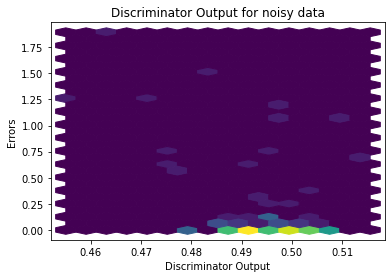

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


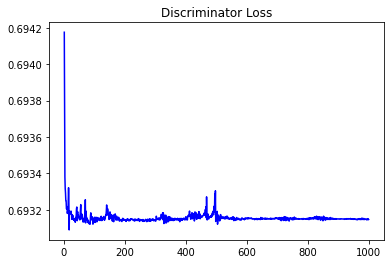

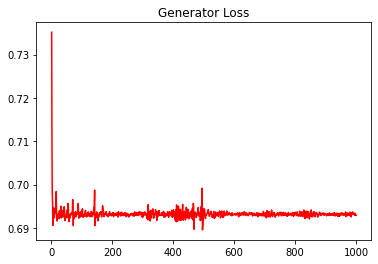

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08297321163541145


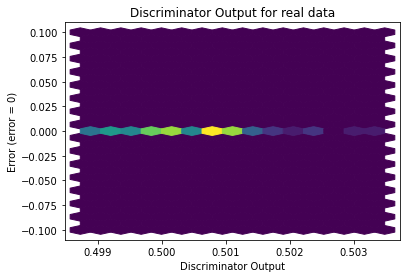

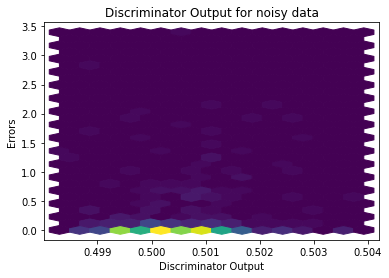

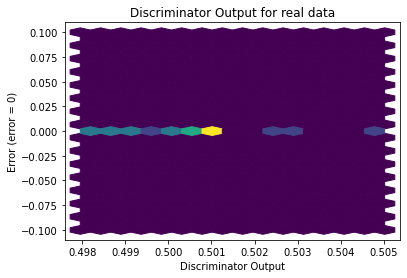

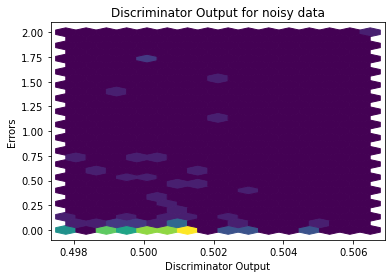

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0333]], requires_grad=True)
